In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-06-03.csv")
df = pd.read_csv("data/inc/data-inc-2024-06-10.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183148 entries, 0 to 183147
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        183148 non-null  int64  
 1   id_mls                    183148 non-null  object 
 2   bathrooms_total           183148 non-null  float64
 3   bedrooms_extra            183148 non-null  float64
 4   bedrooms                  183148 non-null  float64
 5   stories_total             183148 non-null  float64
 6   size_interior             183148 non-null  float64
 7   building_type             183148 non-null  object 
 8   agency_name               183148 non-null  object 
 9   agency_type               183148 non-null  object 
 10  property_type             183148 non-null  object 
 11  lng                       183148 non-null  float64
 12  lat                       183148 non-null  float64
 13  ownership_type            183148 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27014533,24013187,2,3 + 1,2.0,NaN,House,EXP REALTY,Firm,Single Family,...,42.312465,Freehold,1,40.16X,0,https://realtor.ca/real-estate/27014533/126-ra...,638534668667100000,N9B2R5,Ontario,499900.0
1,27011332,24013286,3,4 + 0,2.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.260850,Freehold,1,80.32X115.45,0,https://realtor.ca/real-estate/27011332/3601-b...,638533877162000000,N9E1W9,Ontario,759900.0
2,27010512,24013284,1,3 + 0,2.0,NaN,House,REAL BROKER ONTARIO LTD,Firm,Single Family,...,42.103660,Freehold,1,66.28X141.6,0,https://realtor.ca/real-estate/27010512/156-ri...,638533840904300000,N9V1G4,Ontario,339900.0
3,27010508,24013289,4,3 + 2,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/27010508/1116-w...,638533840892100000,N9A3K2,Ontario,599000.0
4,27010504,24013294,3,4 + 3,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.137781,Freehold,1,70.27X128.49,0,https://realtor.ca/real-estate/27010504/12-bak...,638533840852700000,N9V4A5,Ontario,739900.0


In [5]:
df.shape

(27419, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27419 entries, 0 to 27418
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27419 non-null  int64  
 1   id_mls                    27419 non-null  object 
 2   bathrooms_total           27419 non-null  int64  
 3   bedrooms                  27419 non-null  object 
 4   stories_total             18033 non-null  float64
 5   size_interior             14258 non-null  object 
 6   building_type             27419 non-null  object 
 7   agency_name               27419 non-null  object 
 8   agency_type               27419 non-null  object 
 9   property_type             27419 non-null  object 
 10  lng                       27419 non-null  float64
 11  lat                       27419 non-null  float64
 12  ownership_type            27419 non-null  object 
 13  ownership_type_group_ids  27419 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
5,27010112,24013057,3,6 + 0,2.5,1512.0000,House,EXP REALTY,Firm,Single Family,...,42.310994,Freehold,1,40.15X124.48,0,https://realtor.ca/real-estate/27010112/371-cu...,638533804956600000,N9B2B6,Ontario,569000.0
10,27007967,24013247,2,2 + 1,NaN,1250.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0
20,27007338,24013205,7,5 + 2,2.0,5500.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.223495,Freehold,1,89.89XIRREG,0,https://realtor.ca/real-estate/27007338/15-uni...,638533624532000000,N9H0M9,Ontario,2590000.0
22,27007336,24013210,5,4 + 0,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,Single Family,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/27007336/4300-c...,638533624522770000,N9H0M9,Ontario,1399900.0
28,27006922,24013226,5,5 + 3,2.0,6731.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,Single Family,...,42.215706,Freehold,1,165.81X,0,https://realtor.ca/real-estate/27006922/30-aug...,638533330751400000,N9H0G6,Ontario,2299999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27413,27009101,5835,2,3,NaN,1800 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.445026,none,none,8687,0,https://realtor.ca/real-estate/27009101/141-ba...,638533761325400000,NaN,Northwest Territories,595000.0
27414,27005719,5834,2,3,NaN,1685 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.442529,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27005719/12-496...,638533113280970000,X1A3R5,Northwest Territories,499900.0
27415,26989098,5832,1,2,NaN,927 sqft,Apartment,COLDWELL BANKER NBS,Firm,Single Family,...,62.467068,Condominium/Strata,2,927,0,https://realtor.ca/real-estate/26989098/201-8-...,638531133583130000,NaN,Northwest Territories,424900.0
27416,26983676,5831,1,2,NaN,843 sqft,Apartment,RE/MAX North of 60,Firm,Single Family,...,62.448486,Condominium/Strata,2,1,0,https://realtor.ca/real-estate/26983676/205-48...,638530980602500000,NaN,Northwest Territories,389900.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4218
Ontario                    3512
Alberta                    3075
Quebec                     1613
Manitoba                    658
Saskatchewan                639
New Brunswick               376
Newfoundland & Labrador     139
Yukon                        20
Northwest Territories         8
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    12916
British Columbia            4551
Quebec                      3677
Alberta                     3248
Manitoba                     763
Saskatchewan                 757
Nova Scotia                  664
New Brunswick                470
Newfoundland & Labrador      180
Prince Edward Island         161
Yukon                         24
Northwest Territories          8
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,27419.0,27419.0,18033.0,27419.0,27419.0,27419.0,2.741900e+04,27419.0
mean,26998260.0,2.0,2.0,-90.0,47.0,3.0,6.385324e+17,896558.0
std,11277.0,1.0,5.0,20.0,3.0,4.0,1.441960e+12,1201353.0
min,26976957.0,0.0,1.0,-139.0,42.0,0.0,6.385294e+17,0.0
25%,26990346.0,1.0,1.0,-114.0,44.0,0.0,6.385312e+17,425000.0
50%,26999304.0,2.0,2.0,-80.0,45.0,1.0,6.385323e+17,675000.0
75%,27007724.0,3.0,2.0,-78.0,49.0,4.0,6.385337e+17,999900.0
max,27016616.0,32.0,350.0,-53.0,64.0,248.0,6.385362e+17,87900000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

27402

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

34


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19706,26981264,R2889662,1,1,NaN,701 sqft,Apartment,Interlink Realty,Firm,Single Family,...,49.271575,Strata,2,0,1,https://realtor.ca/real-estate/26981264/2008-1...,638530411627030000,V6A0C5,British Columbia,958000.0
19704,26981264,R2889662,1,1,NaN,701 sqft,Apartment,Interlink Realty,Firm,Single Family,...,49.271575,Strata,2,0,1,https://realtor.ca/real-estate/26981264/2008-1...,638530411627030000,V6A0C5,British Columbia,958000.0
26726,26981582,E4390671,2,4,1.0,101.54 m2,House,Royal Lepage Premier Real Estate,Firm,Single Family,...,53.829212,Freehold,1,NaN,0,https://realtor.ca/real-estate/26981582/4703-5...,638530444375530000,T0A1N0,Alberta,364900.0
26724,26981582,E4390671,2,4,1.0,101.54 m2,House,Royal Lepage Premier Real Estate,Firm,Single Family,...,53.829212,Freehold,1,NaN,0,https://realtor.ca/real-estate/26981582/4703-5...,638530444375530000,T0A1N0,Alberta,364900.0
10877,26988636,X8401208,2,3 + 2,1.0,NaN,House,OUR NEIGHBOURHOOD REALTY INC.,Firm,Single Family,...,44.176669,Freehold,1,100.49 x 150.5 FT,6,https://realtor.ca/real-estate/26988636/717-co...,638531118394700000,K0K3K0,Ontario,549900.0
10876,26988636,X8401208,2,3 + 2,1.0,NaN,House,OUR NEIGHBOURHOOD REALTY INC.,Firm,Single Family,...,44.176669,Freehold,1,100.49 x 150.5 FT,6,https://realtor.ca/real-estate/26988636/717-co...,638531118394700000,K0K3K0,Ontario,549900.0
7102,26990952,E8403012,4,3 + 1,2.0,NaN,House,RIGHT AT HOME REALTY,Firm,Single Family,...,43.832227,Freehold,1,30.61 x 98.43 FT,3,https://realtor.ca/real-estate/26990952/116-ro...,638531261128000000,L1S7B9,Ontario,918888.0
7101,26990952,E8403012,4,3 + 1,2.0,NaN,House,RIGHT AT HOME REALTY,Firm,Single Family,...,43.832227,Freehold,1,30.61 x 98.43 FT,3,https://realtor.ca/real-estate/26990952/116-ro...,638531261128000000,L1S7B9,Ontario,918888.0
2239,26995338,H4196196,3,3,2.0,2000 sqft,House,Pottruff & Oliver Realty Inc.,Firm,Single Family,...,43.383643,Freehold,1,24.76 x 114|under 1/2 acre,3,https://realtor.ca/real-estate/26995338/949-ta...,638532040716400000,N2R0N2,Ontario,999900.0
2240,26995338,H4196196,3,3,2.0,2000 sqft,House,Pottruff & Oliver Realty Inc.,Firm,Single Family,...,43.383643,Freehold,1,24.76 x 114|under 1/2 acre,3,https://realtor.ca/real-estate/26995338/949-ta...,638532040716400000,N2R0N2,Ontario,999900.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19706,26981264,R2889662,1,1,NaN,701 sqft,Apartment,Interlink Realty,Firm,Single Family,...,49.271575,Strata,2,0,1,https://realtor.ca/real-estate/26981264/2008-1...,638530411627030000,V6A0C5,British Columbia,958000.0
26726,26981582,E4390671,2,4,1.0,101.54 m2,House,Royal Lepage Premier Real Estate,Firm,Single Family,...,53.829212,Freehold,1,NaN,0,https://realtor.ca/real-estate/26981582/4703-5...,638530444375530000,T0A1N0,Alberta,364900.0
10877,26988636,X8401208,2,3 + 2,1.0,NaN,House,OUR NEIGHBOURHOOD REALTY INC.,Firm,Single Family,...,44.176669,Freehold,1,100.49 x 150.5 FT,6,https://realtor.ca/real-estate/26988636/717-co...,638531118394700000,K0K3K0,Ontario,549900.0
7102,26990952,E8403012,4,3 + 1,2.0,NaN,House,RIGHT AT HOME REALTY,Firm,Single Family,...,43.832227,Freehold,1,30.61 x 98.43 FT,3,https://realtor.ca/real-estate/26990952/116-ro...,638531261128000000,L1S7B9,Ontario,918888.0
2240,26995338,H4196196,3,3,2.0,2000 sqft,House,Pottruff & Oliver Realty Inc.,Firm,Single Family,...,43.383643,Freehold,1,24.76 x 114|under 1/2 acre,3,https://realtor.ca/real-estate/26995338/949-ta...,638532040716400000,N2R0N2,Ontario,999900.0
6102,26997200,W8407728,4,5 + 1,NaN,NaN,House,RE/MAX CHAMPIONS REALTY INC.,Firm,Single Family,...,43.755469,Freehold,1,55 x 200 FT,6,https://realtor.ca/real-estate/26997200/10-lar...,638532132579100000,M9L2N1,Ontario,2399900.0
9877,26997999,S8408352,1,1 + 1,NaN,NaN,Apartment,ROYAL LEPAGE RCR REALTY,Firm,Single Family,...,44.355270,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26997999/220-68...,638532200831500000,L4N4E8,Ontario,499900.0
5703,26999684,E8409330,5,4 + 3,2.0,NaN,House,JDL REALTY INC.,Firm,Single Family,...,43.811673,Freehold,1,21 x 115 FT,3,https://realtor.ca/real-estate/26999684/63-sil...,638532482825670000,M1V2P1,Ontario,988000.0
5303,27001636,W8410840,4,4 + 3,NaN,NaN,House,METRICS REALTY INC.,Firm,Single Family,...,43.708239,Freehold,1,55.18 x 135.46 FT|under 1/2 acre,5,https://realtor.ca/real-estate/27001636/406-gl...,638532851659770000,M6B2E5,Ontario,1699999.0
5302,27001638,W8410846,2,3,1.0,NaN,House,RE/MAX ESCARPMENT TEAM LOGUE REALTY,Firm,Single Family,...,43.477891,Freehold,1,72 x 125 FT|under 1/2 acre,6,https://realtor.ca/real-estate/27001638/1304-e...,638532851662970000,L6H2J7,Ontario,1349000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(27385, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27385 entries, 0 to 27418
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        27385 non-null  int64  
 1   id_mls                    27385 non-null  object 
 2   bathrooms_total           27385 non-null  int64  
 3   bedrooms                  27385 non-null  object 
 4   stories_total             18009 non-null  float64
 5   size_interior             14250 non-null  object 
 6   building_type             27385 non-null  object 
 7   agency_name               27385 non-null  object 
 8   agency_type               27385 non-null  object 
 9   property_type             27385 non-null  object 
 10  lng                       27385 non-null  float64
 11  lat                       27385 non-null  float64
 12  ownership_type            27385 non-null  object 
 13  ownership_type_group_ids  27385 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  15779
Condominium/Strata         4493
none                       4119
Strata                     1979
Condominium                 545
Leasehold                   208
Freehold Condo               96
Leasehold Condo/Strata       38
Leasehold/Leased Land        38
Undivided Co-ownership       37
Shares in Co-operative       19
Unknown                      14
Other, See Remarks           10
Timeshare/Fractional          5
Cooperative                   4
Life Lease                    1
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                         15565
Apartment                      5010
Row / Townhouse                2821
none                           2062
Duplex                          710
Mobile Home                     192
Triplex                         177
No Building                     146
Unknown                         126
Multi-Family                    121
Other                           113
Manufactured Home               109
Recreational                     91
Fourplex                         73
Manufactured Home/Mobile         22
Modular                          14
Two Apartment House              12
Commercial Mix                   12
Parking                           6
Floathome                         2
Residential Commercial Mix        1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  81
none                      22
Strata                     4
Leasehold/Leased Land      2
Freehold Condo             1
Other, See Remarks         1
Leasehold                  1
Shares in Co-operative     1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    24868
Vacant Land       1926
Multi-family       369
Agriculture        120
Recreational        96
Parking              6
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24868 entries, 0 to 27417
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24868 non-null  int64  
 1   id_mls                    24868 non-null  object 
 2   bathrooms_total           24868 non-null  int64  
 3   bedrooms                  24868 non-null  object 
 4   stories_total             17644 non-null  float64
 5   size_interior             13894 non-null  object 
 6   building_type             24868 non-null  object 
 7   agency_name               24868 non-null  object 
 8   agency_type               24868 non-null  object 
 9   property_type             24868 non-null  object 
 10  lng                       24868 non-null  float64
 11  lat                       24868 non-null  float64
 12  ownership_type            24868 non-null  object 
 13  ownership_type_group_ids  24868 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    12033
British Columbia            4181
Quebec                      3240
Alberta                     3043
Manitoba                     653
Saskatchewan                 635
Nova Scotia                  481
New Brunswick                363
Newfoundland & Labrador      116
Prince Edward Island          95
Yukon                         20
Northwest Territories          8
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       15551
Apartment                    5000
Row / Townhouse              2818
Duplex                        602
none                          328
Mobile Home                   191
Triplex                       132
Manufactured Home             107
Fourplex                       49
Recreational                   29
Manufactured Home/Mobile       22
Modular                        14
Two Apartment House            12
Other                           9
Multi-Family                    2
Floathome                       2
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  14413
Condominium/Strata         4466
none                       3056
Strata                     1954
Condominium                 544
Leasehold                   196
Freehold Condo               89
Undivided Co-ownership       37
Leasehold Condo/Strata       37
Leasehold/Leased Land        35
Shares in Co-operative       15
Unknown                       9
Other, See Remarks            7
Timeshare/Fractional          5
Cooperative                   4
Life Lease                    1
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
44,27000936,24013135,2,4 + 2,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.309887,none,none,32.12X70.33,0,https://realtor.ca/real-estate/27000936/191-er...,638532833319430000,N9A3W9,Ontario,299900.0
116,26981644,24012834,2,2 + 0,NaN,1181.0000,none,EXP REALTY,Firm,Single Family,...,42.247219,none,none,200X400,0,https://realtor.ca/real-estate/26981644/1740-s...,638530456919000000,N9J1X7,Ontario,609900.0
181,27008841,24012307,2,3 + 0,2.0,1377.0000,House,RE/MAX Sarnia Realty Inc,Firm,Single Family,...,42.397001,none,none,42.5X103.75,0,https://realtor.ca/real-estate/27008841/128-lo...,638533737663270000,N7M1S1,Ontario,284900.0
299,26997238,X8407218,1,1,1.0,NaN,House,EASY LIST REALTY,Firm,Single Family,...,42.615930,none,none,50 x 100 FT,0,https://realtor.ca/real-estate/26997238/1758-r...,638532133990800000,N8A4K9,Ontario,144500.0
357,26990802,X8403152,2,1 + 1,2.0,NaN,Triplex,PC275 REALTY INC.,Firm,Single Family,...,42.973620,none,none,41.99 x 100 FT|under 1/2 acre,0,https://realtor.ca/real-estate/26990802/185-br...,638531256948600000,N7T5Z4,Ontario,399900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27408,27003411,5833,1,2,NaN,1140 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,60.811925,none,none,7382,0,https://realtor.ca/real-estate/27003411/91-riv...,638532951480770000,NaN,Northwest Territories,80000.0
27410,26993223,15681,2,6,NaN,3200 sqft,Row / Townhouse,2% Realty Midnight Sun,Firm,Single Family,...,62.228611,none,none,10450 sqft,0,https://realtor.ca/real-estate/26993223/114116...,638531554781870000,Y0B1K0,Yukon,259000.0
27411,27011434,5837,1,3,NaN,1130 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.435994,none,none,5543,0,https://realtor.ca/real-estate/27011434/22-hor...,638533887458570000,NaN,Northwest Territories,404900.0
27412,27011351,5836,3,3,NaN,1606 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.465002,none,none,4621,0,https://realtor.ca/real-estate/27011351/a-157-...,638533878831430000,NaN,Northwest Territories,614900.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

44       https://realtor.ca/real-estate/27000936/191-er...
116      https://realtor.ca/real-estate/26981644/1740-s...
181      https://realtor.ca/real-estate/27008841/128-lo...
299      https://realtor.ca/real-estate/26997238/1758-r...
357      https://realtor.ca/real-estate/26990802/185-br...
                               ...                        
27408    https://realtor.ca/real-estate/27003411/91-riv...
27410    https://realtor.ca/real-estate/26993223/114116...
27411    https://realtor.ca/real-estate/27011434/22-hor...
27412    https://realtor.ca/real-estate/27011351/a-157-...
27413    https://realtor.ca/real-estate/27009101/141-ba...
Name: page_url, Length: 3056, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

605      https://realtor.ca/real-estate/27001865/454-ri...
675      https://realtor.ca/real-estate/26994852/20-lin...
982      https://realtor.ca/real-estate/27015440/3033-t...
1112     https://realtor.ca/real-estate/26982060/1035-l...
2032     https://realtor.ca/real-estate/27000624/580-be...
2145     https://realtor.ca/real-estate/26997730/26-jas...
2685     https://realtor.ca/real-estate/26977526/5862-w...
2687     https://realtor.ca/real-estate/26977389/7-pepp...
9830     https://realtor.ca/real-estate/27000239/9-mapl...
9834     https://realtor.ca/real-estate/27000058/3-weep...
10039    https://realtor.ca/real-estate/26993456/21-nat...
12834    https://realtor.ca/real-estate/26990680/3535-s...
16088    https://realtor.ca/real-estate/26981215/1033-e...
24935    https://realtor.ca/real-estate/27013539/8-knig...
Name: page_url, dtype: object

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,,
Alberta,603,225,0,4,1758,37,0,28,0,0,0,2,382,1,0,3
British Columbia,1326,130,2,2,1993,63,22,17,0,0,0,1,621,0,0,4
Manitoba,57,18,0,0,530,0,0,14,0,0,3,0,31,0,0,0
New Brunswick,0,0,0,0,344,0,0,9,0,0,0,0,5,0,0,5
Newfoundland & Labrador,0,0,0,0,101,0,0,1,0,2,0,0,0,0,12,0
Northwest Territories,2,0,0,0,2,3,0,1,0,0,0,0,0,0,0,0
Nova Scotia,15,5,0,0,394,0,0,20,0,0,0,24,19,0,0,4
Ontario,2154,55,0,4,7814,1,0,48,13,0,6,2,1664,15,0,257
Prince Edward Island,6,3,0,0,77,0,0,4,0,0,0,0,5,0,0,0


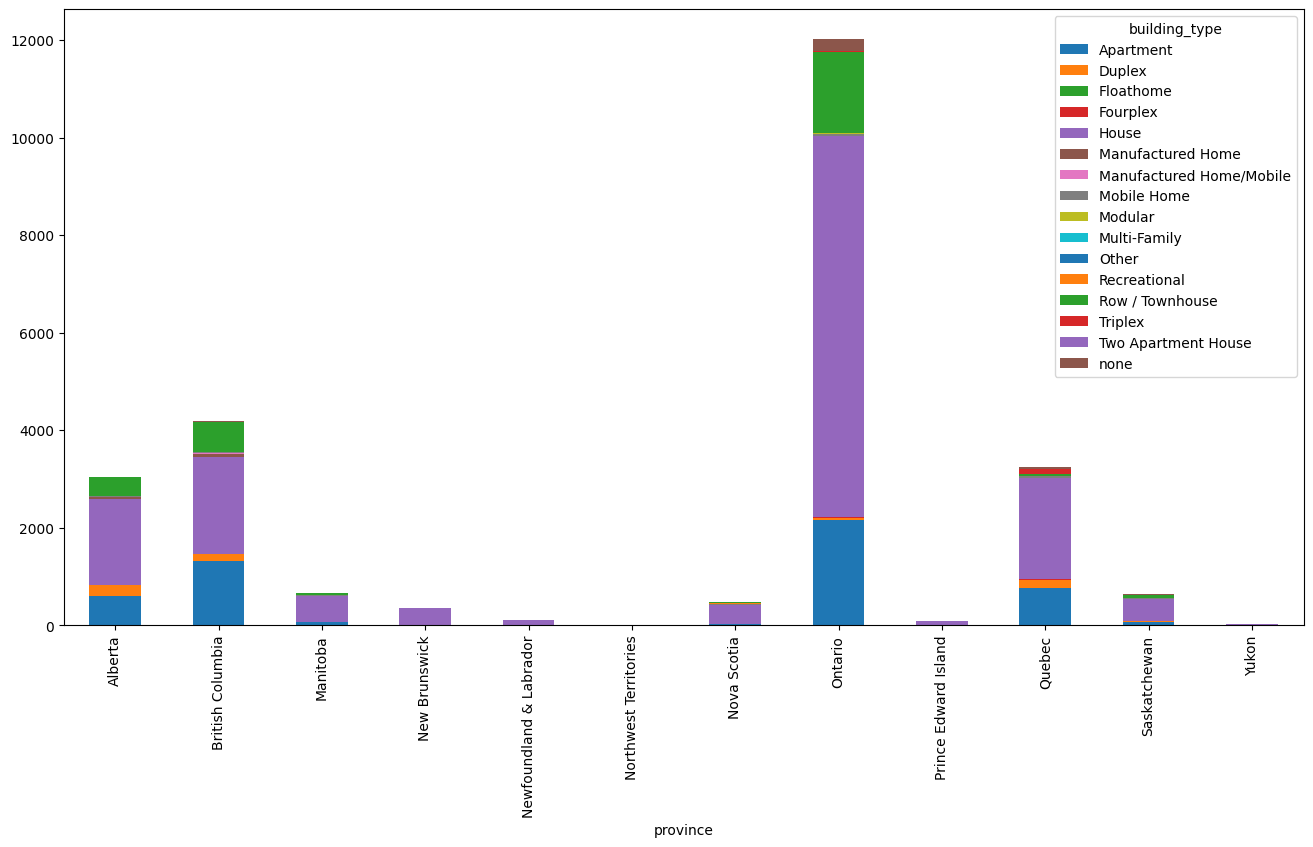

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

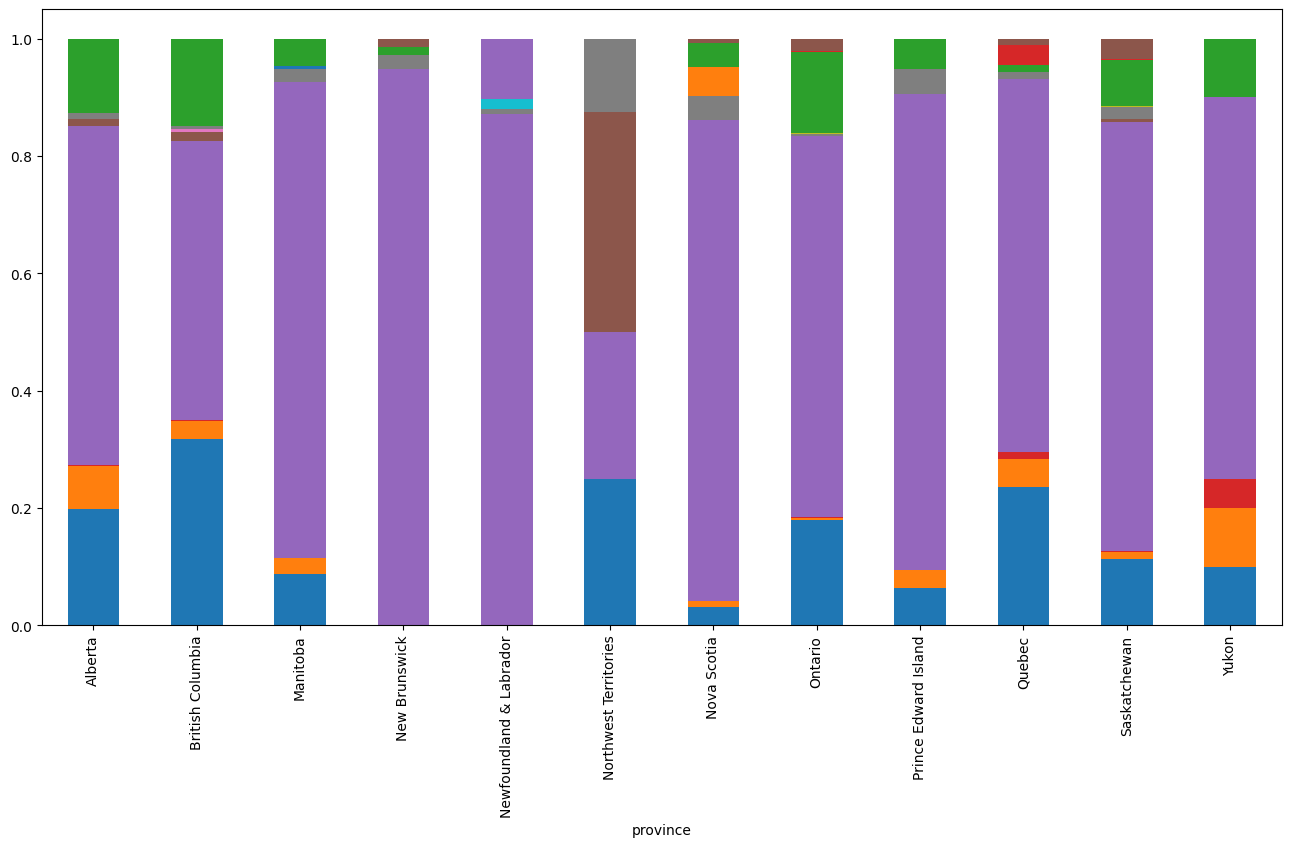

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,985,0,1920,0,11,0,0,0,0,0,0,0,0,0,127
British Columbia,0,67,0,1974,0,73,35,35,0,6,11,1954,1,0,5,20
Manitoba,0,2,0,551,89,10,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,7,0,245,0,19,0,0,0,0,0,0,0,0,0,92
Newfoundland & Labrador,0,0,0,112,0,1,0,0,0,0,0,0,0,0,0,3
Northwest Territories,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Nova Scotia,0,25,0,445,0,7,0,0,0,0,0,0,2,1,1,0
Ontario,544,2440,4,8590,0,61,2,0,1,1,4,0,2,4,0,380
Prince Edward Island,0,10,0,81,0,2,0,0,0,0,0,0,0,0,2,0


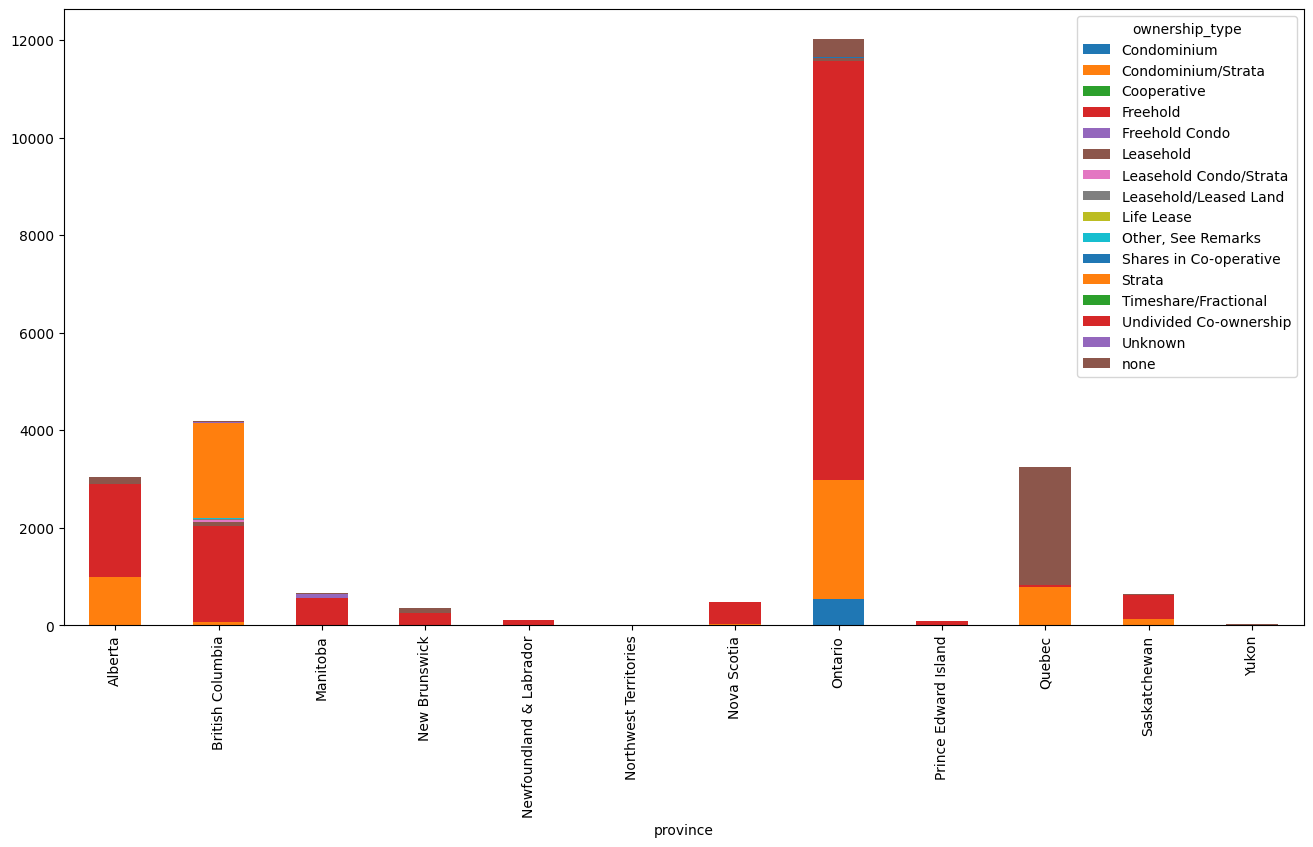

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

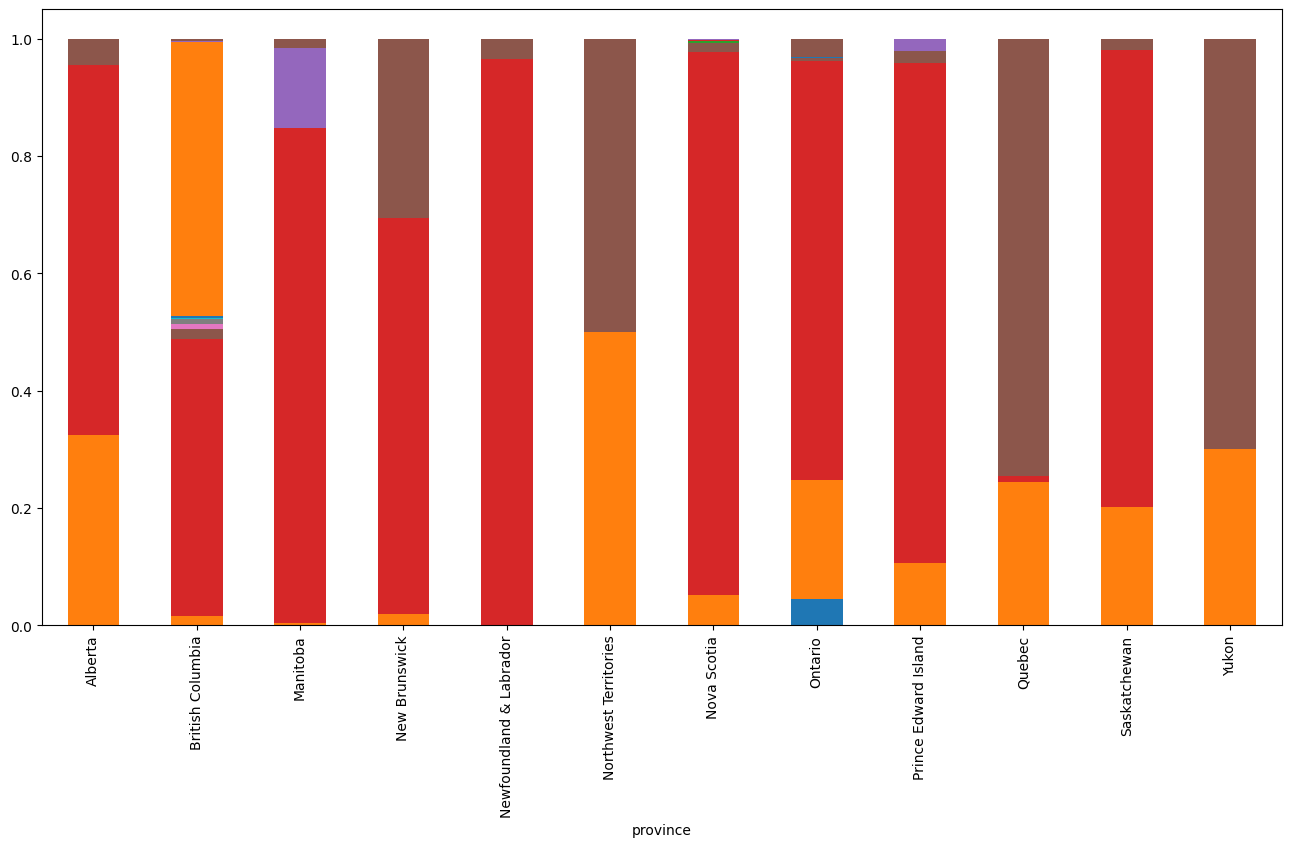

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3279
Strata                    1208
Condominium                322
Freehold Condo              53
Undivided Co-ownership      35
Leasehold Condo/Strata      29
Freehold                    26
Leasehold/Leased Land       17
Shares in Co-operative      11
Leasehold                    8
none                         4
Cooperative                  3
Timeshare/Fractional         2
Unknown                      2
Life Lease                   1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                 279
none                     203
Strata                    73
Condominium/Strata        44
Leasehold/Leased Land      2
Leasehold                  1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,,
Condominium,322,0,0,0,26,0,0,0,0,0,0,0,188,0,0,8
Condominium/Strata,3279,44,0,3,85,7,0,1,0,0,0,1,1004,0,0,42
Cooperative,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Freehold,26,279,0,4,12872,43,16,50,4,2,2,25,1017,2,12,59
Freehold Condo,53,0,0,0,12,0,0,0,0,0,1,0,23,0,0,0
Leasehold,8,1,2,0,69,34,6,57,10,0,0,2,3,0,0,4
Leasehold Condo/Strata,29,0,0,0,0,1,0,1,0,0,0,0,6,0,0,0
Leasehold/Leased Land,17,2,0,0,13,2,0,0,0,0,0,0,1,0,0,0
Life Lease,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


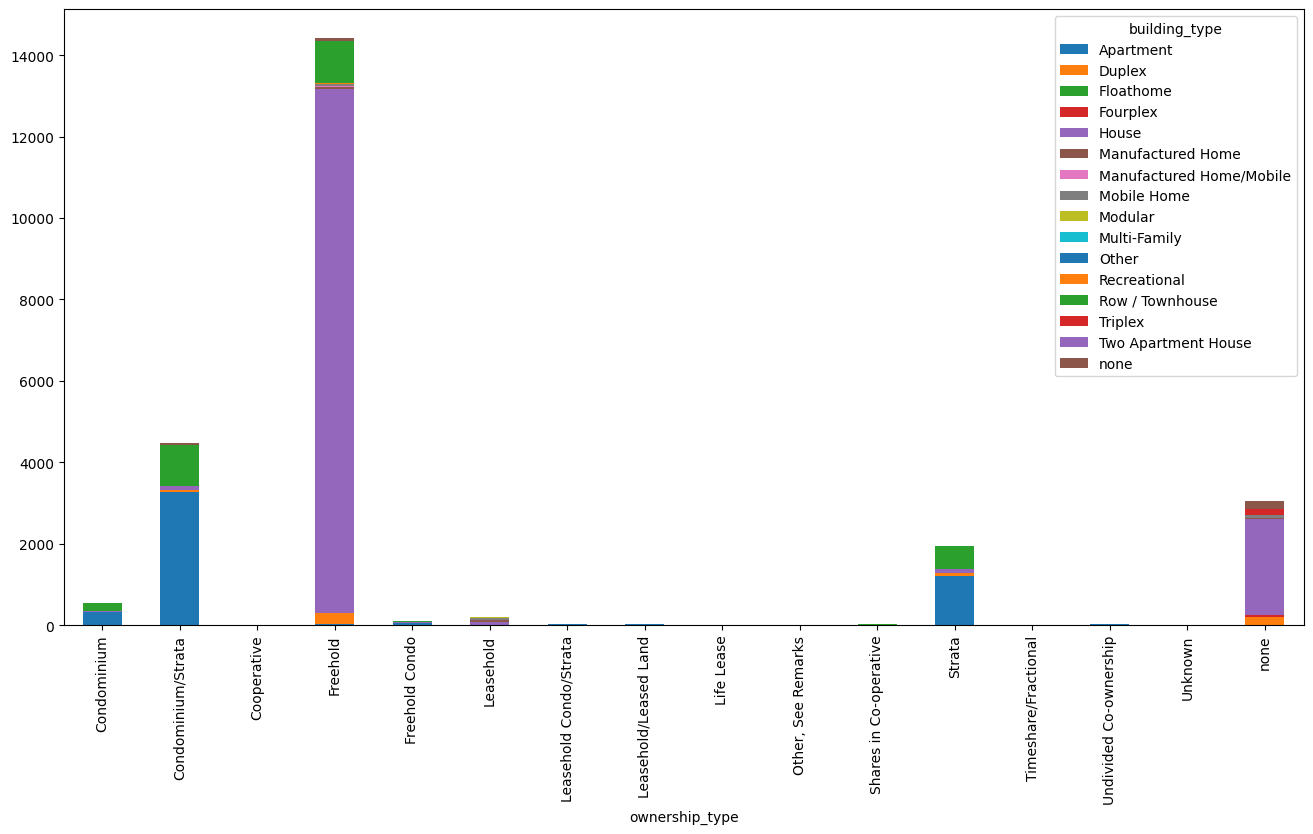

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

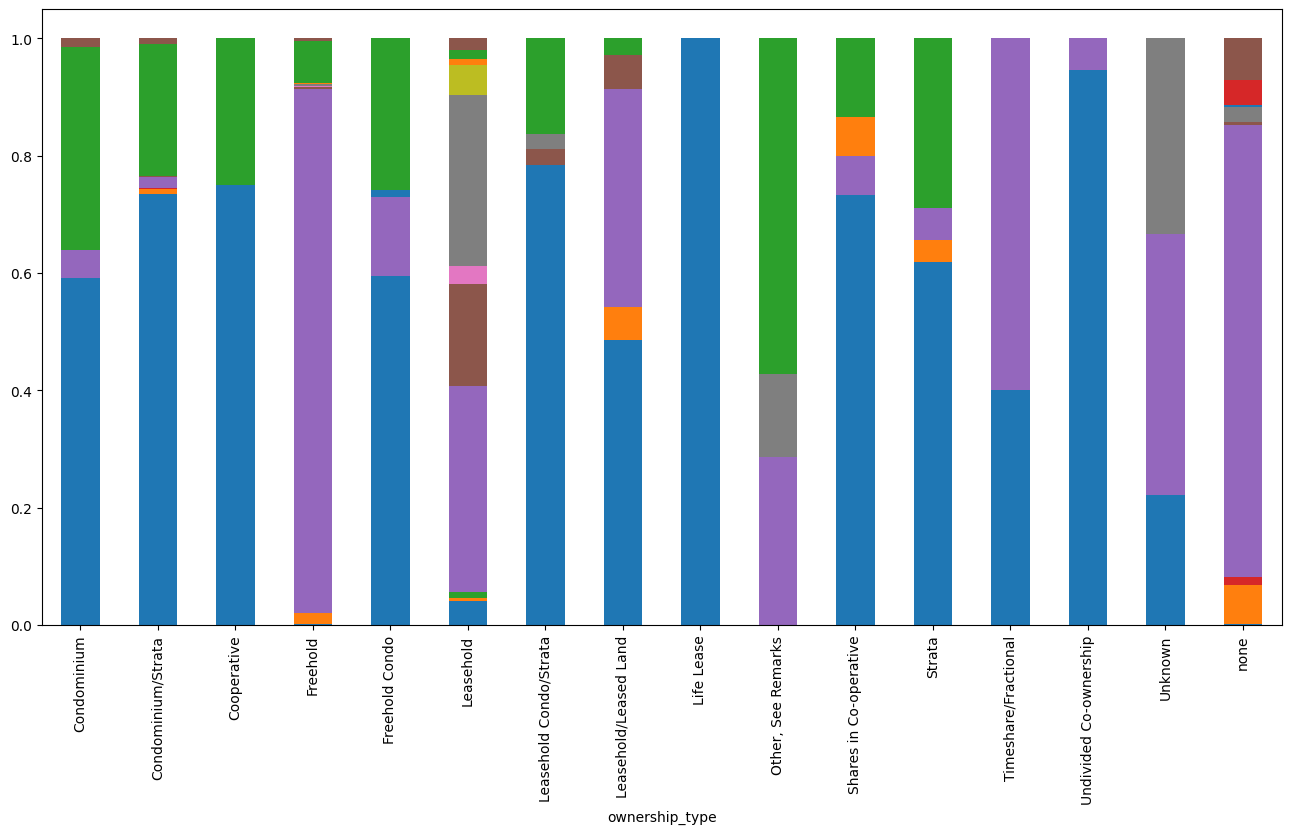

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,602.0,602.0,365.0,602.0,602.0,602.0,6.020000e+02,602.0
mean,26999693.0,3.0,2.0,-101.0,49.0,2.0,6.385326e+17,748237.0
std,11468.0,1.0,0.0,21.0,3.0,3.0,1.474334e+12,591240.0
min,26977075.0,0.0,1.0,-135.0,42.0,0.0,6.385295e+17,30000.0
25%,26992124.0,2.0,2.0,-114.0,46.0,0.0,6.385314e+17,398796.0
50%,27001319.0,3.0,2.0,-113.0,49.0,2.0,6.385328e+17,549900.0
75%,27010072.0,3.0,2.0,-74.0,51.0,4.0,6.385338e+17,874750.0
max,27016598.0,7.0,4.0,-60.0,61.0,58.0,6.385362e+17,4000000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,132.0,132.0,69.0,132.0,132.0,132.0,1.320000e+02,132.0
mean,26998369.0,1.0,2.0,-75.0,46.0,3.0,6.385324e+17,884838.0
std,11617.0,1.0,1.0,5.0,1.0,3.0,1.491970e+12,470230.0
min,26977413.0,1.0,1.0,-114.0,43.0,0.0,6.385297e+17,75000.0
25%,26990102.0,1.0,2.0,-74.0,45.0,0.0,6.385312e+17,549000.0
50%,26999782.0,1.0,2.0,-74.0,46.0,3.0,6.385325e+17,796950.0
75%,27007958.0,1.0,3.0,-73.0,46.0,6.0,6.385337e+17,1096250.0
max,27016176.0,6.0,3.0,-69.0,54.0,13.0,6.385358e+17,2995000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,49.0,49.0,28.0,49.0,49.0,49.0,4.900000e+01,49.0
mean,27000696.0,2.0,2.0,-81.0,47.0,4.0,6.385328e+17,975253.0
std,13086.0,1.0,1.0,17.0,3.0,3.0,1.686495e+12,679441.0
min,26977872.0,0.0,1.0,-135.0,43.0,0.0,6.385301e+17,174649.0
25%,26990581.0,1.0,2.0,-76.0,45.0,0.0,6.385312e+17,559900.0
50%,27005242.0,1.0,2.0,-74.0,46.0,4.0,6.385331e+17,850000.0
75%,27012291.0,2.0,2.0,-73.0,47.0,6.0,6.385339e+17,1224500.0
max,27016183.0,8.0,4.0,-69.0,61.0,12.0,6.385358e+17,4250000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2818.0,2818.0,2098.0,2818.0,2818.0,2818.0,2.818000e+03,2818.0
mean,26999131.0,3.0,2.0,-94.0,46.0,2.0,6.385325e+17,773337.0
std,10890.0,1.0,1.0,19.0,4.0,5.0,1.394138e+12,426650.0
min,26977003.0,0.0,1.0,-135.0,42.0,0.0,6.385295e+17,1.0
25%,26991506.0,2.0,2.0,-114.0,44.0,1.0,6.385313e+17,529900.0
50%,27000374.0,3.0,2.0,-80.0,44.0,2.0,6.385328e+17,719900.0
75%,27008214.0,3.0,3.0,-79.0,49.0,2.0,6.385337e+17,919000.0
max,27016614.0,10.0,32.0,-62.0,62.0,202.0,6.385362e+17,6995000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       15551
Apartment                    5000
Row / Townhouse              2818
Semi-Detached                 783
none                          328
Mobile Home                   191
Manufactured Home             107
Recreational                   29
Manufactured Home/Mobile       22
Modular                        14
Two Apartment House            12
Other                           9
Multi-Family                    2
Floathome                       2
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              15551
Apartment           5000
Row / Townhouse     2818
Semi-Detached        783
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24152 entries, 0 to 27416
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        24152 non-null  int64  
 1   id_mls                    24152 non-null  object 
 2   bathrooms_total           24152 non-null  int64  
 3   bedrooms                  24152 non-null  object 
 4   stories_total             17191 non-null  float64
 5   size_interior             13395 non-null  object 
 6   building_type             24152 non-null  object 
 7   agency_name               24152 non-null  object 
 8   agency_type               24152 non-null  object 
 9   property_type             24152 non-null  object 
 10  lng                       24152 non-null  float64
 11  lat                       24152 non-null  float64
 12  ownership_type            24152 non-null  object 
 13  ownership_type_group_ids  24152 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    11706
British Columbia            4072
Quebec                      3171
Alberta                     2973
Manitoba                     636
Saskatchewan                 596
Nova Scotia                  433
New Brunswick                349
Newfoundland & Labrador      101
Prince Edward Island          91
Yukon                         20
Northwest Territories          4
Name: count, dtype: int64

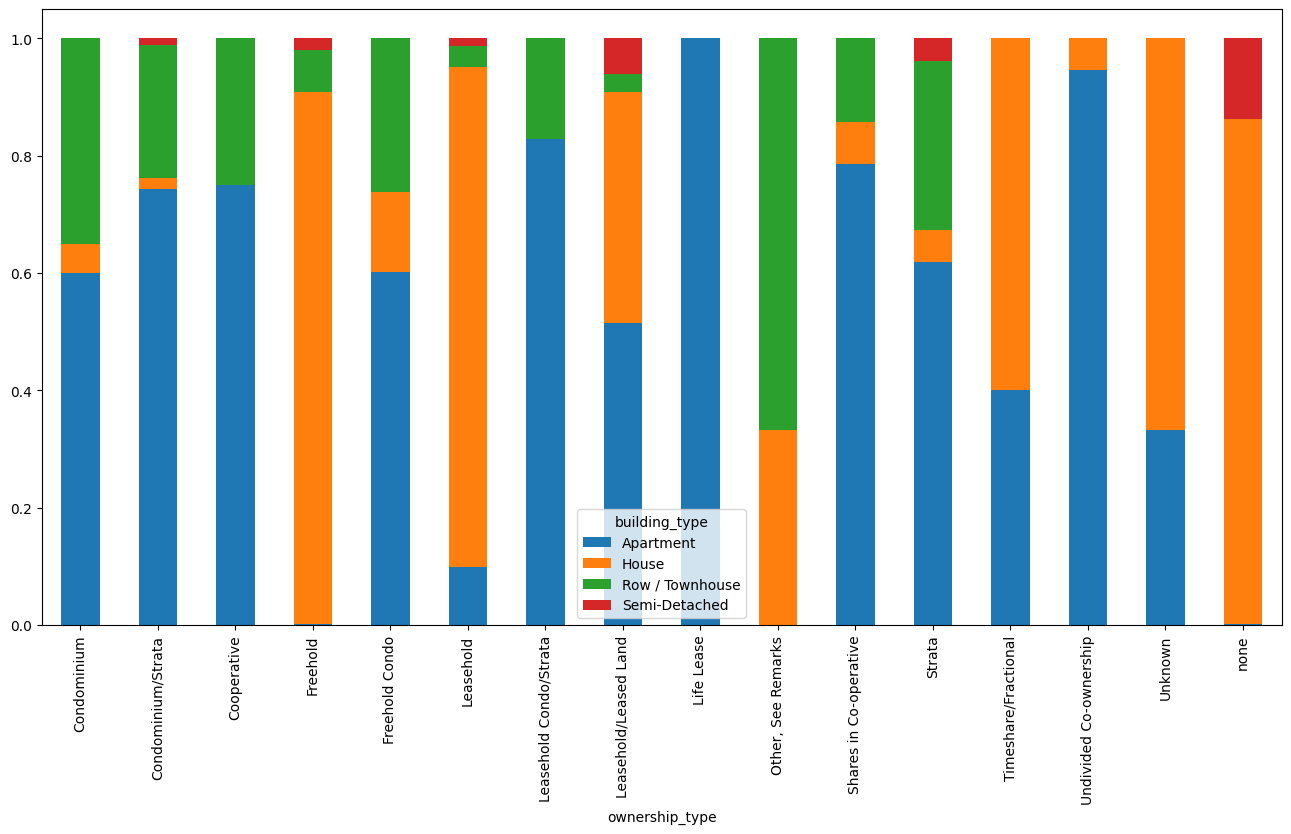

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14200
2           7041
none        2748
4            114
1 2           37
1 2 3 4        6
3              5
2 3            1
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12872
none        2358
2            230
4             82
1 2 3 4        4
3              3
1 2            2
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2          4902
1 2          35
1            26
4            25
none          7
3             2
1 2 3 4       2
2 3           1
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    374
1       285
2       121
4         3
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1788
1       1017
none       9
4          4
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,14200.0,14200.0,11587.0,14200.0,14200.0,14200.0,1.420000e+04,14200.0
mean,26998464.0,3.0,2.0,-90.0,46.0,3.0,6.385324e+17,1073881.0
std,11108.0,1.0,1.0,18.0,4.0,4.0,1.415035e+12,1017239.0
min,26976958.0,0.0,1.0,-130.0,42.0,0.0,6.385294e+17,1.0
25%,26990585.0,2.0,1.0,-113.0,44.0,0.0,6.385312e+17,559999.0
50%,26999912.0,3.0,2.0,-80.0,45.0,3.0,6.385327e+17,829999.0
75%,27007680.0,4.0,2.0,-79.0,49.0,5.0,6.385337e+17,1288000.0
max,27016613.0,16.0,32.0,-53.0,59.0,248.0,6.385362e+17,26888000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2748.0,2748.0,2454.0,2748.0,2748.0,2748.0,2.748000e+03,2748.0
mean,26998419.0,2.0,2.0,-75.0,46.0,4.0,6.385324e+17,693620.0
std,11475.0,1.0,1.0,10.0,2.0,4.0,1.504315e+12,855355.0
min,26976963.0,0.0,1.0,-135.0,42.0,0.0,6.385294e+17,49900.0
25%,26990765.0,1.0,1.0,-74.0,45.0,2.0,6.385313e+17,368750.0
50%,26999112.0,2.0,2.0,-74.0,46.0,4.0,6.385323e+17,549000.0
75%,27007876.0,2.0,2.0,-72.0,46.0,6.0,6.385337e+17,799000.0
max,27016616.0,10.0,4.0,-53.0,62.0,36.0,6.385362e+17,23900000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,5.0,5.0,4.0,5.0,5.0,5.0,5.000000e+00,5.0
mean,27003135.0,3.0,2.0,-82.0,46.0,1.0,6.385330e+17,583920.0
std,4413.0,1.0,0.0,26.0,2.0,1.0,6.164642e+11,536638.0
min,26998708.0,1.0,2.0,-125.0,44.0,0.0,6.385323e+17,55900.0
25%,27000131.0,2.0,2.0,-79.0,45.0,0.0,6.385328e+17,149000.0
50%,27001106.0,3.0,2.0,-79.0,45.0,0.0,6.385328e+17,485000.0
75%,27007406.0,3.0,2.0,-64.0,46.0,2.0,6.385336e+17,879900.0
max,27008322.0,4.0,2.0,-60.0,50.0,3.0,6.385337e+17,1349800.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,114.0,114.0,80.0,114.0,114.0,114.0,1.140000e+02,114.0
mean,26997092.0,2.0,2.0,-101.0,48.0,1.0,6.385322e+17,532192.0
std,10508.0,1.0,1.0,22.0,3.0,1.0,1.319339e+12,410564.0
min,26977229.0,0.0,1.0,-124.0,42.0,0.0,6.385296e+17,89900.0
25%,26990300.0,1.0,1.0,-122.0,45.0,0.0,6.385312e+17,273400.0
50%,26998374.0,2.0,1.0,-109.0,49.0,0.0,6.385322e+17,449000.0
75%,27004627.0,2.0,2.0,-80.0,50.0,2.0,6.385330e+17,699900.0
max,27015916.0,4.0,4.0,-55.0,55.0,6.0,6.385356e+17,2990000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,6.0,6.0,2.0,6.0,6.0,6.0,6.000000e+00,6.0
mean,26993272.0,2.0,2.0,-108.0,49.0,1.0,6.385317e+17,1265450.0
std,14191.0,1.0,1.0,24.0,1.0,1.0,1.740349e+12,1898143.0
min,26977226.0,1.0,1.0,-123.0,46.0,0.0,6.385296e+17,319900.0
25%,26981950.0,1.0,1.0,-123.0,49.0,0.0,6.385305e+17,380500.0
50%,26993334.0,2.0,2.0,-120.0,49.0,0.0,6.385318e+17,511900.0
75%,27003621.0,2.0,2.0,-104.0,50.0,1.0,6.385330e+17,718450.0
max,27010535.0,5.0,2.0,-63.0,50.0,2.0,6.385338e+17,5125000.0


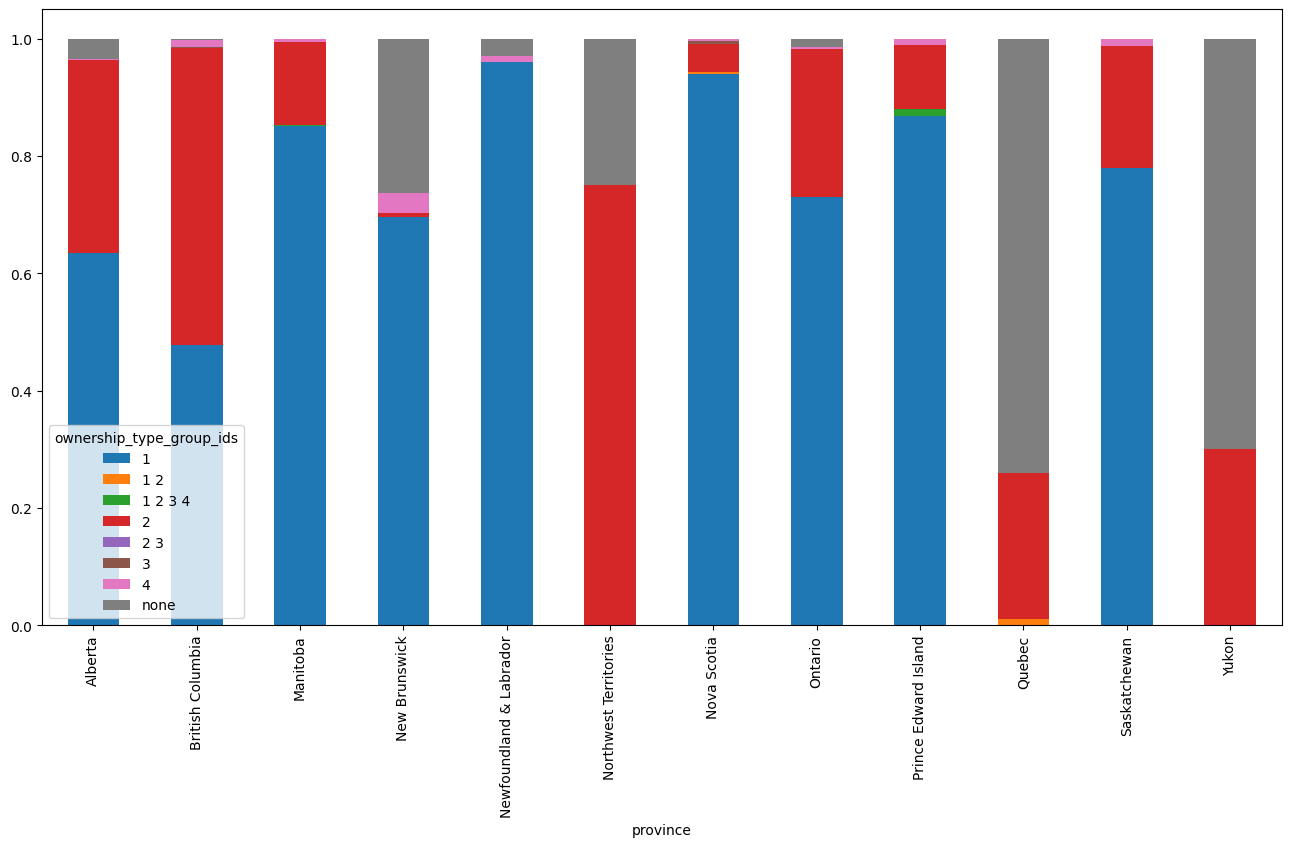

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14200
2           7041
none        2748
4            114
1 2           37
1 2 3 4        6
3              5
2 3            1
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_8329/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    14200
2     7041
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21241 entries, 0 to 27416
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21241 non-null  int64  
 1   id_mls                    21241 non-null  object 
 2   bathrooms_total           21241 non-null  int64  
 3   bedrooms                  21241 non-null  object 
 4   stories_total             14625 non-null  float64
 5   size_interior             12240 non-null  object 
 6   building_type             21241 non-null  object 
 7   agency_name               21241 non-null  object 
 8   agency_type               21241 non-null  object 
 9   property_type             21241 non-null  object 
 10  lng                       21241 non-null  float64
 11  lat                       21241 non-null  float64
 12  ownership_type            21241 non-null  object 
 13  ownership_type_group_ids  21241 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    11493
British Columbia            4005
Alberta                     2864
Quebec                       792
Manitoba                     631
Saskatchewan                 588
Nova Scotia                  428
New Brunswick                245
Newfoundland & Labrador       97
Prince Edward Island          89
Yukon                          6
Northwest Territories          3
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8329/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    11816
True      9425
Name: count, dtype: int64

In [73]:
df.shape

(21241, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8329/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27014533,24013187,2,3 + 1,2.0,NaN,House,EXP REALTY,Firm,Single Family,...,42.312465,Freehold,1,40.16X,0,https://realtor.ca/real-estate/27014533/126-ra...,638534668667100000,N9B2R5,Ontario,499900.0
1,27011332,24013286,3,4 + 0,2.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,Single Family,...,42.260850,Freehold,1,80.32X115.45,0,https://realtor.ca/real-estate/27011332/3601-b...,638533877162000000,N9E1W9,Ontario,759900.0
2,27010512,24013284,1,3 + 0,2.0,NaN,House,REAL BROKER ONTARIO LTD,Firm,Single Family,...,42.103660,Freehold,1,66.28X141.6,0,https://realtor.ca/real-estate/27010512/156-ri...,638533840904300000,N9V1G4,Ontario,339900.0
3,27010508,24013289,4,3 + 2,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/27010508/1116-w...,638533840892100000,N9A3K2,Ontario,599000.0
4,27010504,24013294,3,4 + 3,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.137781,Freehold,1,70.27X128.49,0,https://realtor.ca/real-estate/27010504/12-bak...,638533840852700000,N9V4A5,Ontario,739900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_8329/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    4104
1    3598
2    1423
3     255
4      42
5       3
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

21241

In [80]:
bedrooms_extra[:20]

['1',
 '0',
 '0',
 '2',
 '3',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '2',
 '1']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27014533,24013187,1,2,3 + 1,2.0,NaN,House,EXP REALTY,Firm,...,42.312465,Freehold,1,40.16X,0,https://realtor.ca/real-estate/27014533/126-ra...,638534668667100000,N9B2R5,Ontario,499900.0
1,27011332,24013286,0,3,4 + 0,2.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.260850,Freehold,1,80.32X115.45,0,https://realtor.ca/real-estate/27011332/3601-b...,638533877162000000,N9E1W9,Ontario,759900.0
2,27010512,24013284,0,1,3 + 0,2.0,NaN,House,REAL BROKER ONTARIO LTD,Firm,...,42.103660,Freehold,1,66.28X141.6,0,https://realtor.ca/real-estate/27010512/156-ri...,638533840904300000,N9V1G4,Ontario,339900.0
3,27010508,24013289,2,4,3 + 2,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/27010508/1116-w...,638533840892100000,N9A3K2,Ontario,599000.0
4,27010504,24013294,3,3,4 + 3,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.137781,Freehold,1,70.27X128.49,0,https://realtor.ca/real-estate/27010504/12-bak...,638533840852700000,N9V4A5,Ontario,739900.0
5,27010112,24013057,0,3,6 + 0,2.5,1512.0000,House,EXP REALTY,Firm,...,42.310994,Freehold,1,40.15X124.48,0,https://realtor.ca/real-estate/27010112/371-cu...,638533804956600000,N9B2B6,Ontario,569000.0
6,27010111,24013272,0,2,5 + 0,1.0,NaN,House,SAVE MAX WINCITY REALTY,Firm,...,42.293540,Freehold,1,45.54X90,0,https://realtor.ca/real-estate/27010111/1159-d...,638533804928070000,N9C3H9,Ontario,399900.0
7,27010110,24013280,0,2,4 + 0,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.298970,Freehold,1,31X100 FEET,0,https://realtor.ca/real-estate/27010110/1508-c...,638533804909730000,N8X1V3,Ontario,399900.0
8,27008780,24013263,0,2,3 + 0,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.134615,Freehold,1,51.96X154.73,0,https://realtor.ca/real-estate/27008780/103-ki...,638533732590270000,N9V4B6,Ontario,709000.0
10,27007967,24013247,1,2,2 + 1,NaN,1250.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_8329/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21241 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21241 non-null  int64  
 1   id_mls                    21241 non-null  object 
 2   bedrooms_extra            21241 non-null  object 
 3   bathrooms_total           21241 non-null  int64  
 4   bedrooms                  21241 non-null  object 
 5   stories_total             14625 non-null  float64
 6   size_interior             12240 non-null  object 
 7   building_type             21241 non-null  object 
 8   agency_name               21241 non-null  object 
 9   agency_type               21241 non-null  object 
 10  property_type             21241 non-null  object 
 11  lng                       21241 non-null  float64
 12  lat                       21241 non-null  float64
 13  ownership_type            21241 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_8329/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27014533,24013187,1,2,3,2.0,NaN,House,EXP REALTY,Firm,...,42.312465,Freehold,1,40.16X,0,https://realtor.ca/real-estate/27014533/126-ra...,638534668667100000,N9B2R5,Ontario,499900.0
1,27011332,24013286,0,3,4,2.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.260850,Freehold,1,80.32X115.45,0,https://realtor.ca/real-estate/27011332/3601-b...,638533877162000000,N9E1W9,Ontario,759900.0
2,27010512,24013284,0,1,3,2.0,NaN,House,REAL BROKER ONTARIO LTD,Firm,...,42.103660,Freehold,1,66.28X141.6,0,https://realtor.ca/real-estate/27010512/156-ri...,638533840904300000,N9V1G4,Ontario,339900.0
3,27010508,24013289,2,4,3,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/27010508/1116-w...,638533840892100000,N9A3K2,Ontario,599000.0
4,27010504,24013294,3,3,4,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.137781,Freehold,1,70.27X128.49,0,https://realtor.ca/real-estate/27010504/12-bak...,638533840852700000,N9V4A5,Ontario,739900.0
5,27010112,24013057,0,3,6,2.5,1512.0000,House,EXP REALTY,Firm,...,42.310994,Freehold,1,40.15X124.48,0,https://realtor.ca/real-estate/27010112/371-cu...,638533804956600000,N9B2B6,Ontario,569000.0
6,27010111,24013272,0,2,5,1.0,NaN,House,SAVE MAX WINCITY REALTY,Firm,...,42.293540,Freehold,1,45.54X90,0,https://realtor.ca/real-estate/27010111/1159-d...,638533804928070000,N9C3H9,Ontario,399900.0
7,27010110,24013280,0,2,4,2.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.298970,Freehold,1,31X100 FEET,0,https://realtor.ca/real-estate/27010110/1508-c...,638533804909730000,N8X1V3,Ontario,399900.0
8,27008780,24013263,0,2,3,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.134615,Freehold,1,51.96X154.73,0,https://realtor.ca/real-estate/27008780/103-ki...,638533732590270000,N9V4B6,Ontario,709000.0
10,27007967,24013247,1,2,2,NaN,1250.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21241 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21241 non-null  int64  
 1   id_mls                    21241 non-null  object 
 2   bedrooms_extra            21241 non-null  int64  
 3   bathrooms_total           21241 non-null  int64  
 4   bedrooms                  21241 non-null  int64  
 5   stories_total             14625 non-null  float64
 6   size_interior             12240 non-null  object 
 7   building_type             21241 non-null  object 
 8   agency_name               21241 non-null  object 
 9   agency_type               21241 non-null  object 
 10  property_type             21241 non-null  object 
 11  lng                       21241 non-null  float64
 12  lat                       21241 non-null  float64
 13  ownership_type            21241 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    11493
British Columbia            4005
Alberta                     2864
Quebec                       792
Manitoba                     631
Saskatchewan                 588
Nova Scotia                  428
New Brunswick                245
Newfoundland & Labrador       97
Prince Edward Island          89
Yukon                          6
Northwest Territories          3
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21241 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21241 non-null  int64  
 1   id_mls                    21241 non-null  object 
 2   bedrooms_extra            21241 non-null  int64  
 3   bathrooms_total           21241 non-null  int64  
 4   bedrooms                  21241 non-null  int64  
 5   stories_total             14625 non-null  float64
 6   size_interior             12240 non-null  object 
 7   building_type             21241 non-null  object 
 8   agency_name               21241 non-null  object 
 9   agency_type               21241 non-null  object 
 10  property_type             21241 non-null  object 
 11  lng                       21241 non-null  float64
 12  lat                       21241 non-null  float64
 13  ownership_type            21241 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,27014533,24013187,1,2,3,2.0,NaN,House,EXP REALTY,Firm,...,42.312465,Freehold,1,40.16X,0,https://realtor.ca/real-estate/27014533/126-ra...,638534668667100000,N9B2R5,Ontario,499900.0
1,27011332,24013286,0,3,4,2.0,NaN,House,KELLER WILLIAMS LIFESTYLES REALTY,Firm,...,42.260850,Freehold,1,80.32X115.45,0,https://realtor.ca/real-estate/27011332/3601-b...,638533877162000000,N9E1W9,Ontario,759900.0
2,27010512,24013284,0,1,3,2.0,NaN,House,REAL BROKER ONTARIO LTD,Firm,...,42.103660,Freehold,1,66.28X141.6,0,https://realtor.ca/real-estate/27010512/156-ri...,638533840904300000,N9V1G4,Ontario,339900.0
3,27010508,24013289,2,4,3,1.0,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.319843,Freehold,1,34.33X125.62,0,https://realtor.ca/real-estate/27010508/1116-w...,638533840892100000,N9A3K2,Ontario,599000.0
4,27010504,24013294,3,3,4,NaN,NaN,House,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.137781,Freehold,1,70.27X128.49,0,https://realtor.ca/real-estate/27010504/12-bak...,638533840852700000,N9V4A5,Ontario,739900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      4997
1.50       533
1.75        43
2.00      6964
2.50       170
3.00      1120
3.50         1
4.00       324
5.00        53
6.00        81
7.00        23
8.00        59
9.00        14
10.00       12
11.00        6
12.00       10
13.00        5
14.00       11
15.00       20
16.00       12
17.00       10
18.00       12
19.00        8
20.00       10
21.00       14
22.00        4
23.00        8
24.00        5
25.00        8
26.00       15
27.00        5
28.00        4
29.00        6
30.00        4
31.00        3
32.00        7
33.00        2
34.00        4
35.00        1
36.00        5
38.00        4
40.00        2
41.00        2
43.00        1
44.00        7
48.00        1
50.00        2
51.00        2
52.00        2
53.00        1
55.00        2
57.00        1
89.00        1
147.00       1
197.00       1
286.00       1
350.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4997
1.50      533
1.75       43
2.00     6964
2.50      170
3.00     1120
3.50        1
4.00      324
5.00       53
6.00       81
7.00       23
8.00       59
9.00       14
10.00      12
11.00       6
12.00      10
13.00       5
14.00      11
15.00      20
16.00      12
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3178
House              2599
Row / Townhouse     709
Semi-Detached       130
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

4        https://realtor.ca/real-estate/27010504/12-bak...
8        https://realtor.ca/real-estate/27008780/103-ki...
10       https://realtor.ca/real-estate/27007967/380-pe...
13       https://realtor.ca/real-estate/27007620/380-pe...
19       https://realtor.ca/real-estate/27007340/27-hil...
                               ...                        
27397    https://realtor.ca/real-estate/26999595/b-30-v...
27400    https://realtor.ca/real-estate/26997422/7-35-s...
27414    https://realtor.ca/real-estate/27005719/12-496...
27415    https://realtor.ca/real-estate/26989098/201-8-...
27416    https://realtor.ca/real-estate/26983676/205-48...
Name: page_url, Length: 6616, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21241 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21241 non-null  int64  
 1   id_mls                    21241 non-null  object 
 2   bedrooms_extra            21241 non-null  int64  
 3   bathrooms_total           21241 non-null  int64  
 4   bedrooms                  21241 non-null  int64  
 5   stories_total             21241 non-null  float64
 6   size_interior             12240 non-null  object 
 7   building_type             21241 non-null  object 
 8   agency_name               21241 non-null  object 
 9   agency_type               21241 non-null  object 
 10  property_type             21241 non-null  object 
 11  lng                       21241 non-null  float64
 12  lat                       21241 non-null  float64
 13  ownership_type            21241 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11613
2.00      6964
3.00      1120
1.50       533
4.00       324
2.50       170
6.00        81
8.00        59
5.00        53
1.75        43
7.00        23
15.00       20
26.00       15
21.00       14
9.00        14
10.00       12
18.00       12
16.00       12
14.00       11
12.00       10
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

109      https://realtor.ca/real-estate/26983845/693-69...
310      https://realtor.ca/real-estate/26995350/1255-l...
552      https://realtor.ca/real-estate/27007362/86-opt...
733      https://realtor.ca/real-estate/26991168/115-96...
745      https://realtor.ca/real-estate/26990561/966-ba...
                               ...                        
27331    https://realtor.ca/real-estate/27000502/2-220-...
27337    https://realtor.ca/real-estate/26998544/21-220...
27362    https://realtor.ca/real-estate/26982744/8-220-...
27376    https://realtor.ca/real-estate/26989232/58-rad...
27379    https://realtor.ca/real-estate/27008831/9110-1...
Name: page_url, Length: 1120, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  583
Alberta                 386
British Columbia        154
Ontario                  70
Saskatchewan              2
Prince Edward Island      1
Manitoba                  1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

472      https://realtor.ca/real-estate/27015542/b118-2...
1523     https://realtor.ca/real-estate/27013550/42-gre...
1796     https://realtor.ca/real-estate/27006273/5-wake...
1916     https://realtor.ca/real-estate/27003072/19-41-...
1959     https://realtor.ca/real-estate/27002082/41-val...
                               ...                        
27338    https://realtor.ca/real-estate/26998227/1409-3...
27339    https://realtor.ca/real-estate/26998162/2416-3...
27343    https://realtor.ca/real-estate/26996478/404-13...
27344    https://realtor.ca/real-estate/26995597/108-96...
27353    https://realtor.ca/real-estate/26990033/305-96...
Name: page_url, Length: 1197, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
27397    False
27400    False
27414    False
27415    False
27416    False
Length: 21241, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
27397    True
27400    True
27414    True
27415    True
27416    True
Length: 21241, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 472 to 27353
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1197 non-null   int64  
 1   id_mls                    1197 non-null   object 
 2   bedrooms_extra            1197 non-null   int64  
 3   bathrooms_total           1197 non-null   int64  
 4   bedrooms                  1197 non-null   int64  
 5   stories_total             1197 non-null   float64
 6   size_interior             1145 non-null   object 
 7   building_type             1197 non-null   object 
 8   agency_name               1197 non-null   object 
 9   agency_type               1197 non-null   object 
 10  property_type             1197 non-null   object 
 11  lng                       1197 non-null   float64
 12  lat                       1197 non-null   float64
 13  ownership_type            1197 non-null   object 
 14  ownership_

In [106]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# # set storeys for all appartments to 1
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11613
2.00      6831
3.00       842
1.50       533
2.50       170
1.75        43
4.00         8
5.00         2
32.00        1
3.50         1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([ 2.  ,  1.  ,  2.5 ,  1.75,  1.5 ,  3.  ,  4.  , 32.  ,  5.  ,
        3.5 ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    11423
British Columbia            3851
Alberta                     2478
Manitoba                     630
Saskatchewan                 586
Nova Scotia                  428
New Brunswick                245
Quebec                       209
Newfoundland & Labrador       97
Prince Edward Island          88
Yukon                          6
Northwest Territories          3
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  object 
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1200 sqft    28
1400 sqft    26
1200.0000    24
1120 sqft    21
1800.0000    20
             ..
1647 sqft     1
717 sqft      1
1443 sqft     1
1273.6200     1
843 sqft      1
Name: count, Length: 6300, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
5,27010112,24013057,0,3,6,2.5,1512.0000,House,EXP REALTY,Firm,...,42.310994,Freehold,1,40.15X124.48,0,https://realtor.ca/real-estate/27010112/371-cu...,638533804956600000,N9B2B6,Ontario,569000.0
10,27007967,24013247,1,2,2,1.0,1250.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0
20,27007338,24013205,2,7,5,2.0,5500.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.223495,Freehold,1,89.89XIRREG,0,https://realtor.ca/real-estate/27007338/15-uni...,638533624532000000,N9H0M9,Ontario,2590000.0
22,27007336,24013210,0,5,4,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/27007336/4300-c...,638533624522770000,N9H0M9,Ontario,1399900.0
28,27006922,24013226,3,5,5,2.0,6731.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.215706,Freehold,1,165.81X,0,https://realtor.ca/real-estate/27006922/30-aug...,638533330751400000,N9H0G6,Ontario,2299999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27397,26999595,15685,0,2,2,1.0,1326 sqft,Semi-Detached,RE/MAX ACTION REALTY,Firm,...,60.693534,Condominium/Strata,2,6028 sqft,0,https://realtor.ca/real-estate/26999595/b-30-v...,638532442760470000,Y1A6V9,Yukon,529900.0
27400,26997422,15682,0,3,3,1.0,1864 sqft,Semi-Detached,EXP Realty,Firm,...,60.780929,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26997422/7-35-s...,638532149054630000,Y1A0R6,Yukon,489000.0
27414,27005719,5834,0,2,3,1.0,1685 sqft,House,RE/MAX North of 60,Firm,...,62.442529,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27005719/12-496...,638533113280970000,X1A3R5,Northwest Territories,499900.0
27415,26989098,5832,0,1,2,1.0,927 sqft,Apartment,COLDWELL BANKER NBS,Firm,...,62.467068,Condominium/Strata,2,927,0,https://realtor.ca/real-estate/26989098/201-8-...,638531133583130000,NaN,Northwest Territories,424900.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
5,27010112,24013057,0,3,6,2.5,1512.0000,House,EXP REALTY,Firm,...,42.310994,Freehold,1,40.15X124.48,0,https://realtor.ca/real-estate/27010112/371-cu...,638533804956600000,N9B2B6,Ontario,569000.0
10,27007967,24013247,1,2,2,1.0,1250.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0
20,27007338,24013205,2,7,5,2.0,5500.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.223495,Freehold,1,89.89XIRREG,0,https://realtor.ca/real-estate/27007338/15-uni...,638533624532000000,N9H0M9,Ontario,2590000.0
22,27007336,24013210,0,5,4,2.0,2800.0000,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/27007336/4300-c...,638533624522770000,N9H0M9,Ontario,1399900.0
28,27006922,24013226,3,5,5,2.0,6731.0000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.215706,Freehold,1,165.81X,0,https://realtor.ca/real-estate/27006922/30-aug...,638533330751400000,N9H0G6,Ontario,2299999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,27004694,40601944,0,1,2,1.5,850.0000,House,"SUTTON-CHOICE REAL ESTATE INC., BROKERAGE",Firm,...,46.288721,Freehold,1,6.11 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/27004694/1743-r...,638533036024500000,P0H1V0,Ontario,299900.0
17309,27008328,40601666,0,1,3,1.0,622.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.046496,Freehold,1,0.94 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/27008328/180-la...,638533713922200000,P0H2H0,Ontario,319900.0
17310,27002531,40601602,0,1,2,1.0,560.0000,House,theRealtyCommission.com,Firm,...,47.718460,Freehold,1,1/2 - 1.99 acres,0,https://realtor.ca/real-estate/27002531/93-ont...,638532917585500000,P0J1G0,Ontario,350000.0
18104,26995288,TB241599,0,2,2,1.0,1235.0000,Apartment,SIGNATURE NORTH REALTY INC.,Firm,...,48.440702,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26995288/104-16...,638532031666170000,P7A7V1,Ontario,239900.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21771,27010759,A2138561,0,3,4,1.0,3513.61 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.614600,Freehold,1,3.11 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/27010759/2712-v...,638533852695930000,T0K0E0,Alberta,1295000.0
21772,27007961,A2138984,1,3,2,2.0,1943.09 sqft,House,eXp Realty of Canada,Firm,...,49.551625,Freehold,1,3.26 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/27007961/1709-e...,638533696846330000,T0K1C0,Alberta,889000.0
21776,26993906,A2135665,2,3,3,1.0,1292.53 sqft,House,eXp Realty,Firm,...,49.629889,Freehold,1,"1906.12 m2|10,890 - 21,799 sqft (1/4 - 1/2 ac)",14,https://realtor.ca/real-estate/26993906/1405-6...,638531925184230000,T0K0M0,Alberta,775000.0
21777,26992717,A2138222,0,1,2,1.0,842 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.610392,Freehold,1,"5500 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26992717/13030-...,638531422560970000,T0K0E0,Alberta,550000.0
21780,26981118,A2137582,1,5,3,1.0,2166 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.639890,Freehold,1,3.01 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26981118/2301-t...,638530402585200000,T0K0M0,Alberta,1259000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,27008831,A2138914,2,3,3,3.0,6022 sqft,House,RE/MAX Grande Prairie,Firm,...,58.187640,Freehold,1,1.22 ac|1 - 1.99 acres,10,https://realtor.ca/real-estate/27008831/9110-1...,638533736495300000,T0H2H0,Alberta,1300000.0
27381,27006640,A2139158,0,3,4,2.0,2580 sqft,House,M&M Real Estate,Firm,...,58.476322,Freehold,1,8.26 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/27006640/109324...,638533241628630000,T0H1Z0,Alberta,349900.0
27383,26990225,A2137736,0,2,2,1.0,1490 sqft,Row / Townhouse,RE/MAX Grande Prairie,Firm,...,58.186280,Condominium/Strata,2,"385 m2|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26990225/9905-1...,638531195656970000,T0H2H0,Alberta,399000.0
27384,26982503,A2137727,3,2,2,1.0,1536 sqft,House,RE/MAX Grande Prairie,Firm,...,58.191422,Freehold,1,"756 m2|7,251 - 10,889 sqft",6,https://realtor.ca/real-estate/26982503/10201-...,638530533192800000,T0H2H0,Alberta,270000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
12195,27013910,20813314,0,1,2,1.0,1044.1 sqft,Apartment,Royal LePage Vallée de l'Outaouais,Firm,...,45.499357,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27013910/76-rue...,638534530201400000,J8V4B3,Quebec,298900.0
12934,26982346,19379955,0,1,1,1.0,121.07 sqft,Apartment,Royal LePage Vallée de l'Outaouais,Firm,...,45.435630,Condominium/Strata,2,1784.76 sqft,1,https://realtor.ca/real-estate/26982346/205-ru...,638530498250270000,J9J1N8,Quebec,269900.0
12983,26979278,20839957,0,1,2,1.0,836.36 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.423651,Condominium/Strata,2,110.56 m2,1,https://realtor.ca/real-estate/26979278/175-av...,638530284205700000,J9A2L3,Quebec,279900.0
13047,26977093,22582294,0,1,2,1.0,1068.86 sqft,Apartment,EXP AGENCE IMMOBILIÈRE - Gatineau,Firm,...,45.480191,Condominium/Strata,2,107.07 m2,1,https://realtor.ca/real-estate/26977093/515-bo...,638529489621330000,J8T8R8,Quebec,384700.0
13191,27005419,14781843,0,2,3,1.0,1240 sqft,Row / Townhouse,ROYAL LEPAGE DU QUARTIER,Firm,...,45.382653,Condominium/Strata,2,2295 sqft,2,https://realtor.ca/real-estate/27005419/431-av...,638533078526370000,J7M0M1,Quebec,489000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16856,26994351,20562522,0,1,2,1.0,2879.45 sqft,Row / Townhouse,RE/MAX AVANTAGES INC. - St-Georges,Firm,...,46.130242,Condominium/Strata,2,NaN,4,https://realtor.ca/real-estate/26994351/2605-1...,638531976155100000,G5Y5J2,Quebec,169000.0
17340,27003750,18488620,0,2,2,1.0,678.13 sqft,House,VIA CAPITALE SÉLECT,Firm,...,47.012826,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/27003750/102-ch...,638532983569500000,G3C0P2,Quebec,389900.0
17345,26980734,16044549,0,2,2,1.0,91.2 sqft,Row / Townhouse,GROUPE SUTTON-NOUVELLE DEMEURE,Firm,...,47.037952,Condominium/Strata,2,6647.7 m2,2,https://realtor.ca/real-estate/26980734/7-ch-d...,638530391626470000,G3C2T7,Quebec,369000.0
17356,27001010,12094460,0,1,2,1.0,790 sqft,Apartment,RE/MAX 1ER CHOIX INC. - Sillery,Firm,...,47.053187,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27001010/251-ru...,638532837171030000,G0A1E0,Quebec,179900.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_8329/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13505,27016081,14586152,0,1,2,1.0,80.92 m2,Apartment,RE/MAX PLATINE - Dix-30 Brossard,Firm,...,45.453813,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27016081/5400-r...,638535707078100000,J4Z0N9,Quebec,427000.0
13674,27013782,12078955,0,1,2,1.0,143.72 m2,Row / Townhouse,ROYAL LEPAGE VILLAGE,Firm,...,45.492463,Condominium/Strata,2,3248 sqft,1,https://realtor.ca/real-estate/27013782/184-ru...,638534464027930000,H9B1Y5,Quebec,429000.0
14433,26996767,19503899,0,2,4,1.0,115.94 m2,Row / Townhouse,GROUPE GARCIA & LAPIERRE S.E.N.C.,Firm,...,45.532084,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26996767/354-ru...,638532120571230000,J4H1Z8,Quebec,556555.0
14813,26988545,16635649,0,1,2,1.0,120.14 m2,House,RE/MAX ACTION - Westmount,Firm,...,45.609404,Condominium/Strata,2,144 m2,2,https://realtor.ca/real-estate/26988545/716-ru...,638531110866270000,J4B8B1,Quebec,529900.0
14983,26980674,10695621,0,3,3,1.0,201.6 m2,Row / Townhouse,CONSULTANTS CORE IMMOBILIER / CORE CONSULTANTS...,Firm,...,45.474534,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26980674/2680-r...,638530389677770000,H3K1S7,Quebec,1075000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    1070
Quebec        9
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13505,27016081,14586152,0,1,2,1.0,871.02288,Apartment,RE/MAX PLATINE - Dix-30 Brossard,Firm,...,45.453813,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/27016081/5400-r...,638535707078100000,J4Z0N9,Quebec,427000.0
13674,27013782,12078955,0,1,2,1.0,1547.00208,Row / Townhouse,ROYAL LEPAGE VILLAGE,Firm,...,45.492463,Condominium/Strata,2,3248 sqft,1,https://realtor.ca/real-estate/27013782/184-ru...,638534464027930000,H9B1Y5,Quebec,429000.0
14433,26996767,19503899,0,2,4,1.0,1247.97816,Row / Townhouse,GROUPE GARCIA & LAPIERRE S.E.N.C.,Firm,...,45.532084,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26996767/354-ru...,638532120571230000,J4H1Z8,Quebec,556555.0
14813,26988545,16635649,0,1,2,1.0,1293.18696,House,RE/MAX ACTION - Westmount,Firm,...,45.609404,Condominium/Strata,2,144 m2,2,https://realtor.ca/real-estate/26988545/716-ru...,638531110866270000,J4B8B1,Quebec,529900.0
14983,26980674,10695621,0,3,3,1.0,2170.0224,Row / Townhouse,CONSULTANTS CORE IMMOBILIER / CORE CONSULTANTS...,Firm,...,45.474534,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26980674/2680-r...,638530389677770000,H3K1S7,Quebec,1075000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_8329/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
114,26983513,H4195392,0,2,3,1.0,1883 sqft,House,Chase Realty Inc.,Firm,...,42.255996,Freehold,1,85.65 x 153.61|under 1/2 acre,7,https://realtor.ca/real-estate/26983513/723-ca...,638530744145300000,N9G1B5,Ontario,639000.0
162,27012976,24013306,0,2,3,2.0,1770 sqft,House,THAMES REALTY LTD.,Firm,...,42.384548,Freehold,1,43.59XIRREG|under 1/2 acre,0,https://realtor.ca/real-estate/27012976/66-dal...,638534018454530000,N7M5W1,Ontario,489500.0
186,27008753,24013258,0,2,4,2.0,1607 sqft,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.596447,Freehold,1,50X108|under 1/4 acre,0,https://realtor.ca/real-estate/27008753/318-ne...,638533730358000000,N8A4G6,Ontario,399999.0
212,27007083,24013087,0,3,3,1.0,2500 sqft,House,GAGNER & ASSOCIATES EXCEL REALTY SERVICES INC....,Firm,...,42.384159,Freehold,1,250XIrregular|1 - 3 acres,0,https://realtor.ca/real-estate/27007083/9390-k...,638533568331870000,N7M5J3,Ontario,829900.0
296,26997395,24013042,0,1,2,1.0,1302 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.248987,Freehold,1,51.33X119.77,0,https://realtor.ca/real-estate/26997395/11-hom...,638532146493170000,N0P2L0,Ontario,539900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3076
Alberta                    1408
Manitoba                    629
Saskatchewan                586
Ontario                     533
Quebec                      186
New Brunswick               136
Newfoundland & Labrador      97
Yukon                         6
Northwest Territories         3
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
114,26983513,H4195392,0,2,3,1.0,1883.0,House,Chase Realty Inc.,Firm,...,42.255996,Freehold,1,85.65 x 153.61|under 1/2 acre,7,https://realtor.ca/real-estate/26983513/723-ca...,638530744145300000,N9G1B5,Ontario,639000.0
162,27012976,24013306,0,2,3,2.0,1770.0,House,THAMES REALTY LTD.,Firm,...,42.384548,Freehold,1,43.59XIRREG|under 1/2 acre,0,https://realtor.ca/real-estate/27012976/66-dal...,638534018454530000,N7M5W1,Ontario,489500.0
186,27008753,24013258,0,2,4,2.0,1607.0,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.596447,Freehold,1,50X108|under 1/4 acre,0,https://realtor.ca/real-estate/27008753/318-ne...,638533730358000000,N8A4G6,Ontario,399999.0
212,27007083,24013087,0,3,3,1.0,2500.0,House,GAGNER & ASSOCIATES EXCEL REALTY SERVICES INC....,Firm,...,42.384159,Freehold,1,250XIrregular|1 - 3 acres,0,https://realtor.ca/real-estate/27007083/9390-k...,638533568331870000,N7M5J3,Ontario,829900.0
296,26997395,24013042,0,1,2,1.0,1302.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.248987,Freehold,1,51.33X119.77,0,https://realtor.ca/real-estate/26997395/11-hom...,638532146493170000,N0P2L0,Ontario,539900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  object 
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  float64
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    11423
British Columbia            3851
Alberta                     2478
Manitoba                     630
Saskatchewan                 586
Nova Scotia                  428
New Brunswick                245
Quebec                       209
Newfoundland & Labrador       97
Prince Edward Island          88
Yukon                          6
Northwest Territories          3
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 8414
Nova Scotia              428
Prince Edward Island      88
Quebec                    14
British Columbia           4
Manitoba                   1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3847.0
Ontario                    3009.0
Manitoba                    629.0
Quebec                      195.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  float64
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                                 1463
0                                                               956
Unknown                                                         296
under 1 acre                                                    173
1/2 - 1.99 acres                                                169
                                                               ... 
24.63 x 86.69 FT                                                  1
34.77 x 101.99 FT ; Pie Shaped Lot Combined w PIN 061690093       1
28.07 x 149.28 FT ; RR: 48.05 Ft.; LT 151.01Ft.                   1
46 x 110 FT                                                       1
1                                                                 1
Name: count, Length: 11025, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10,27007967,24013247,1,2,2,1.0,1250.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0
13,27007620,24013089,0,2,3,1.0,NaN,Apartment,CENTURY 21 TEAMS & ASSOCIATES LTD. - 220,Firm,...,42.316831,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27007620/380-pe...,638533660780800000,N9V6V7,Ontario,439900.0
35,27003274,24013184,0,2,2,1.0,1169.0,Apartment,COLDWELL BANKER URBAN REALTY BROKERAGE,Firm,...,42.236292,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27003274/2550-s...,638532940797700000,N9H2R6,Ontario,449900.0
45,27000930,24013143,0,2,2,1.0,1022.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.224621,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/27000930/7333-m...,638532833306230000,N9H0P4,Ontario,529900.0
46,27000931,24013142,0,2,2,1.0,1022.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.224621,Freehold,1,0X,0,https://realtor.ca/real-estate/27000931/7333-m...,638532833308270000,N9H0P4,Ontario,529900.0
68,26995022,24004535,0,1,1,1.0,950.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.249721,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26995022/1855-w...,638532004966300000,N9H0C7,Ontario,570800.0
70,26995019,24013041,0,1,2,1.0,933.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.316147,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26995019/150-pa...,638532004645000000,N9A7A2,Ontario,274999.0
80,26993668,24012961,0,2,2,1.0,NaN,Apartment,JUMP REALTY INC.,Firm,...,42.236292,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26993668/2550-s...,638531896610300000,N9H0A7,Ontario,499999.0
82,26993664,24012995,0,2,2,1.0,1050.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.244173,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26993664/1885-n...,638531896581300000,N9H1P9,Ontario,399900.0
101,26989128,24012918,0,2,2,1.0,NaN,Apartment,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.250639,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26989128/3915-s...,638531140799570000,N9G2S8,Ontario,349900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

10     https://realtor.ca/real-estate/27007967/380-pe...
13     https://realtor.ca/real-estate/27007620/380-pe...
35     https://realtor.ca/real-estate/27003274/2550-s...
45     https://realtor.ca/real-estate/27000930/7333-m...
46     https://realtor.ca/real-estate/27000931/7333-m...
68     https://realtor.ca/real-estate/26995022/1855-w...
70     https://realtor.ca/real-estate/26995019/150-pa...
80     https://realtor.ca/real-estate/26993668/2550-s...
82     https://realtor.ca/real-estate/26993664/1885-n...
101    https://realtor.ca/real-estate/26989128/3915-s...
108    https://realtor.ca/real-estate/26988182/34-bob...
127    https://realtor.ca/real-estate/26979470/34-bob...
164    https://realtor.ca/real-estate/27011331/8591-r...
169    https://realtor.ca/real-estate/27010513/4789-r...
171    https://realtor.ca/real-estate/27010510/1900-6...
221    https://realtor.ca/real-estate/27004896/106-57...
225    https://realtor.ca/real-estate/27004802/44-rob...
231    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 727
under 1 acre       94
0 x 0              61
Unknown            34
under 1/2 acre     30
                 ... 
1307 sqft           1
775 sqft            1
1405 sqft           1
1865 sqft           1
1                   1
Name: count, Length: 288, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10,27007967,24013247,1,2,2,1.0,1250.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.316831,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27007967/380-pe...,638533696953000000,N9A6V7,Ontario,489900.0
13,27007620,24013089,0,2,3,1.0,NaN,Apartment,CENTURY 21 TEAMS & ASSOCIATES LTD. - 220,Firm,...,42.316831,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27007620/380-pe...,638533660780800000,N9V6V7,Ontario,439900.0
35,27003274,24013184,0,2,2,1.0,1169.0,Apartment,COLDWELL BANKER URBAN REALTY BROKERAGE,Firm,...,42.236292,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27003274/2550-s...,638532940797700000,N9H2R6,Ontario,449900.0
45,27000930,24013143,0,2,2,1.0,1022.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.224621,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/27000930/7333-m...,638532833306230000,N9H0P4,Ontario,529900.0
46,27000931,24013142,0,2,2,1.0,1022.0,Apartment,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,42.224621,Freehold,1,0,0,https://realtor.ca/real-estate/27000931/7333-m...,638532833308270000,N9H0P4,Ontario,529900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  float64
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                   3739
under 1/2 acre                      1433
Unknown                              262
0                                    229
1/2 - 1.99 acres                     168
                                    ... 
90.94 x 114.83 FT|under 1/2 acre       1
59.71 x 134.9 FT|under 1/2 acre        1
44.42 x 90.41 FT|under 1/2 acre        1
21 x 113.68 FT|under 1/2 acre          1
6028 sqft                              1
Name: count, Length: 10759, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

10760

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
90.94 x 114.83 FT|under 1/2 acre    1
59.71 x 134.9 FT|under 1/2 acre     1
44.42 x 90.41 FT|under 1/2 acre     1
21 x 113.68 FT|under 1/2 acre       1
6028 sqft                           1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    14930
True        43
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_8329/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                                          3739
under 1/2 acre                                             3499
Unknown                                                     262
0                                                           229
1/2 - 1.99 acres                                            168
                                                           ... 
44 x 89 FT                                                    1
50 x 148 FT                                                   1
250 x 270 FT   ; Irregular - 1.2 Acres|1/2 - 1.99 acres       1
36.09 x 106.5 FT                                              1
6028 sqft                                                     1
Name: count, Length: 8884, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_8329/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
22,27007336,24013210,0,5,4,2.00,2800.0,House,THE SIGNATURE GROUP REALTY INC,Firm,...,42.235541,Freehold,1,66.56Xirreg,0,https://realtor.ca/real-estate/27007336/4300-c...,638533624522770000,N9H0M9,Ontario,1399900.0
287,26999955,24013101,0,1,2,1.00,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.318540,Freehold,1,60Xirreg,0,https://realtor.ca/real-estate/26999955/19090-...,638532724964970000,N0P2L0,Ontario,699900.0
375,26988460,24012290,0,1,3,1.00,NaN,House,DEERBROOK REALTY INC. - 178,Firm,...,42.256782,Freehold,1,87Xirregular,0,https://realtor.ca/real-estate/26988460/1521-c...,638531105412100000,N0R1A0,Ontario,499900.0
424,26980325,24012801,0,1,3,1.75,NaN,House,DEERBROOK REALTY INC. - 178,Firm,...,42.185572,Freehold,1,210.37Xirreg,0,https://realtor.ca/real-estate/26980325/20385-...,638530349053200000,N0P1W0,Ontario,674900.0
532,27008135,X8416042,0,2,4,1.00,NaN,House,BLUE FOREST REALTY INC.,Firm,...,42.955179,Freehold,1,68.77 x 110.69 FT ; lot size irregular|under...,0,https://realtor.ca/real-estate/27008135/126-od...,638533705111970000,N6J2Z8,Ontario,649900.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  float64
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           25
Ontario                    10
Newfoundland & Labrador     6
Northwest Territories       2
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    11413.0
British Columbia            3826.0
Newfoundland & Labrador       91.0
Northwest Territories          1.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20044 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20044 non-null  int64  
 1   id_mls                    20044 non-null  object 
 2   bedrooms_extra            20044 non-null  int64  
 3   bathrooms_total           20044 non-null  int64  
 4   bedrooms                  20044 non-null  int64  
 5   stories_total             20044 non-null  float64
 6   size_interior             11095 non-null  float64
 7   building_type             20044 non-null  object 
 8   agency_name               20044 non-null  object 
 9   agency_type               20044 non-null  object 
 10  property_type             20044 non-null  object 
 11  lng                       20044 non-null  float64
 12  lat                       20044 non-null  float64
 13  ownership_type            20044 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183148 entries, 0 to 183147
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        183148 non-null  int64  
 1   id_mls                    183148 non-null  object 
 2   bathrooms_total           183148 non-null  float64
 3   bedrooms_extra            183148 non-null  float64
 4   bedrooms                  183148 non-null  float64
 5   stories_total             183148 non-null  float64
 6   size_interior             183148 non-null  float64
 7   building_type             183148 non-null  object 
 8   agency_name               183148 non-null  object 
 9   agency_type               183148 non-null  object 
 10  property_type             183148 non-null  object 
 11  lng                       183148 non-null  float64
 12  lat                       183148 non-null  float64
 13  ownership_type            183148 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(20044, 22)

In [151]:
df_init.shape

(183148, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(19913, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(15562, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,15562.0,15562.0,15562.0,15562.0,15562.0,8916.0,15562.0,15562.0,15562.0,15562.0,1.556200e+04,15562.0
mean,26998425.0,0.0,2.0,3.0,1.0,1624.0,-93.0,47.0,1.0,2.0,6.385324e+17,872723.0
std,11068.0,1.0,1.0,1.0,0.0,830.0,19.0,4.0,0.0,3.0,1.407856e+12,631451.0
min,26976958.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.385294e+17,64900.0
25%,26990636.0,0.0,2.0,2.0,1.0,1040.0,-114.0,44.0,1.0,0.0,6.385312e+17,505000.0
50%,26999608.0,0.0,2.0,3.0,1.0,1424.0,-80.0,45.0,1.0,2.0,6.385324e+17,729900.0
75%,27007633.0,0.0,3.0,3.0,2.0,2034.0,-79.0,49.0,2.0,4.0,6.385337e+17,1049900.0
max,27016614.0,3.0,5.0,8.0,3.0,15012.0,-53.0,62.0,2.0,12.0,6.385362e+17,19999000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.604568
bathrooms_total             0.601572
bedrooms                    0.407127
stories_total               0.326660
lat                         0.083762
timestamp                   0.052629
id                          0.040448
lng                        -0.080327
ownership_type_group_ids   -0.218030
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15562 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15562 non-null  float64
 1   id_mls                    15562 non-null  object 
 2   bedrooms_extra            15562 non-null  float64
 3   bathrooms_total           15562 non-null  float64
 4   bedrooms                  15562 non-null  float64
 5   stories_total             15562 non-null  float64
 6   size_interior             8916 non-null   float64
 7   building_type             15562 non-null  object 
 8   agency_name               15562 non-null  object 
 9   agency_type               15562 non-null  object 
 10  property_type             15562 non-null  object 
 11  lng                       15562 non-null  float64
 12  lat                       15562 non-null  float64
 13  ownership_type            15562 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15562 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15562 non-null  float64
 1   id_mls                    15562 non-null  object 
 2   bedrooms_extra            15562 non-null  float64
 3   bathrooms_total           15562 non-null  float64
 4   bedrooms                  15562 non-null  float64
 5   stories_total             15562 non-null  float64
 6   size_interior             8916 non-null   float64
 7   building_type             15562 non-null  object 
 8   agency_name               15562 non-null  object 
 9   agency_type               15562 non-null  object 
 10  property_type             15562 non-null  object 
 11  lng                       15562 non-null  float64
 12  lat                       15562 non-null  float64
 13  ownership_type            15562 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15562 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15562 non-null  float64
 1   id_mls                    15562 non-null  object 
 2   bedrooms_extra            15562 non-null  float64
 3   bathrooms_total           15562 non-null  float64
 4   bedrooms                  15562 non-null  float64
 5   stories_total             15562 non-null  float64
 6   size_interior             8916 non-null   float64
 7   building_type             15562 non-null  object 
 8   agency_name               15562 non-null  object 
 9   agency_type               15562 non-null  object 
 10  property_type             15562 non-null  object 
 11  lng                       15562 non-null  float64
 12  lat                       15562 non-null  float64
 13  ownership_type            15562 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198710 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        198710 non-null  float64
 1   id_mls                    198710 non-null  object 
 2   bathrooms_total           198710 non-null  float64
 3   bedrooms_extra            198710 non-null  float64
 4   bedrooms                  198710 non-null  float64
 5   stories_total             198710 non-null  float64
 6   size_interior             192064 non-null  float64
 7   building_type             198710 non-null  object 
 8   agency_name               198710 non-null  object 
 9   agency_type               198710 non-null  object 
 10  property_type             198710 non-null  object 
 11  lng                       198710 non-null  float64
 12  lat                       198710 non-null  float64
 13  ownership_type            198710 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

198440

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(198440, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198440 entries, 0 to 27416
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        198440 non-null  float64
 1   id_mls                    198440 non-null  object 
 2   bathrooms_total           198440 non-null  float64
 3   bedrooms_extra            198440 non-null  float64
 4   bedrooms                  198440 non-null  float64
 5   stories_total             198440 non-null  float64
 6   size_interior             191902 non-null  float64
 7   building_type             198440 non-null  object 
 8   agency_name               198440 non-null  object 
 9   agency_type               198440 non-null  object 
 10  property_type             198440 non-null  object 
 11  lng                       198440 non-null  float64
 12  lat                       198440 non-null  float64
 13  ownership_type            198440 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    98749
British Columbia           42585
Alberta                    27263
Quebec                      9367
Saskatchewan                7576
Manitoba                    5921
Nova Scotia                 3293
New Brunswick               2143
Prince Edward Island         700
Newfoundland & Labrador      650
Yukon                        131
Northwest Territories         62
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-06-10.csv", index=False)